<a href="https://colab.research.google.com/github/KhayalAbishov/NLP-Password-Strength/blob/main/NLP_Password_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [2]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# data=pd.read_csv('C://Users//Legion//Desktop//Kaggle//My Models//NLP_Password_Strength//data.csv',error_bad_lines=False)
data=pd.read_csv('data.csv',error_bad_lines=False)
data.head()

In [4]:
len(data)

669640

In [5]:
data['strength'].unique()

array([1, 2, 0])

#### Code to check all the missing values in my dataset

In [6]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [7]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

password    0
strength    0
dtype: int64

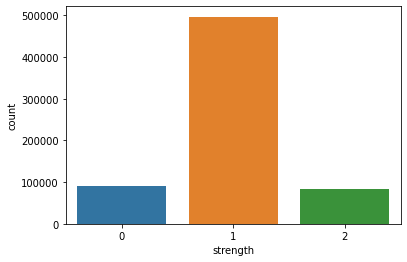

In [10]:
sns.countplot(data['strength'])

In [11]:
password_tuple=np.array(data)

In [12]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### Shuffling randomly for robustness

In [13]:
import random
random.shuffle(password_tuple)

In [14]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [43]:
x[:5]

['kzde5577', 'kino3434', 'kino3434', 'kino3434', 'megzy123']

#### Create a custom function to split input into characters of list

In [16]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [17]:
word_divide_char('new234password')

['n', 'e', 'w', '2', '3', '4', 'p', 'a', 's', 's', 'w', 'o', 'r', 'd']

#### Import Countvectorizer to convert String data into numerical data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer=CountVectorizer(tokenizer=word_divide_char)

#### Apply Countvectorizer on data

In [20]:
X=vectorizer.fit_transform(x)
X

<669639x125 sparse matrix of type '<class 'numpy.int64'>'
	with 5644922 stored elements in Compressed Sparse Row format>

In [21]:
X.shape

(669639, 125)

In [45]:
vectorizer.get_feature_names()[20:30]

[')', '*', '+', '-', '.', '/', '0', '1', '2', '3']

In [23]:
first_document_vector=X[0]
first_document_vector

<1x125 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [46]:
first_document_vector.T.toarray()[20:30]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [25]:
df=pd.DataFrame(first_document_vector.T.toarray(),index=vectorizer.get_feature_names(),columns=['CountVectorizer'])
df.sort_values(by=['CountVectorizer'],ascending=False)

,CountVectorizer
5,2
7,2
z,1
d,1
k,1
...,...
<,0
;,0
9,0
8,0


#### Split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [27]:
X_train.shape

(535711, 125)

#### Apply Logistic on data as use-cas is Classification

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf=LogisticRegression(random_state=42, multi_class='multinomial')

In [30]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

#### Doing prediction for specific custom data

In [31]:
dt=np.array(['1f23abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

#### Doing prediction on X-Train data

In [32]:
y_hat=clf.predict(X_train)
y_hat

array([1, 1, 0, ..., 1, 1, 1])

#### Check Accuracy of your model using confusion_matrix,accuracy_score

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score, mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, recall_score

In [34]:
cm=confusion_matrix(y_train,y_hat)
print(cm)
print(accuracy_score(y_train,y_hat))

[[ 72136      0      0]
 [    62 397050      0]
 [     0     24  66439]]
0.9998394656820562


In [35]:
print('MAE',mean_absolute_error(y_train,y_hat))
print('RMSE',np.sqrt(mean_squared_error(y_train,y_hat)))
print('R2-squared',r2_score(y_train,y_hat))

MAE 0.00016053431794381672
RMSE 0.012670213808133497
R2-squared 0.9993792358349463


#### Doing prediction on X-Test data

In [36]:
y_pred=clf.predict(X_test)
y_pred[0:200]

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 2])

#### Check Accuracy of your model using confusion_matrix,accuracy_score

In [37]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[17996     0     0]
 [   18 99171     1]
 [    0     4 16738]]
0.9998282659339347


In [38]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2-squared',r2_score(y_test,y_pred))

MAE 0.00017173406606534855
RMSE 0.013104734490456056
R2-squared 0.9993376769915504


### Report for model

In [41]:
#Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17996
           1       1.00      1.00      1.00     99190
           2       1.00      1.00      1.00     16742

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928

